In [1]:
from sim.gen_matrix import *
from scipy.sparse import csr_matrix, csgraph

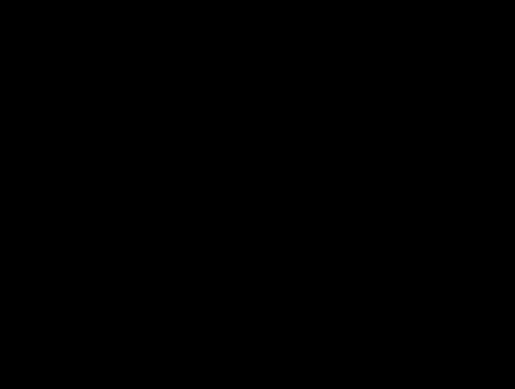

In [2]:
A = weighted_directed_grid4x4(seed=42)
G = nx.from_scipy_sparse_array(A, create_using=nx.DiGraph, edge_attribute="weight")
layout = nx.layout.spring_layout(G)
ipx.network(G, layout=layout)

In [3]:
csgraph.breadth_first_order(A, 0, directed=True)[0]

array([ 0,  1,  4,  2,  5,  8,  3,  6,  9, 12,  7, 10, 13, 11, 14, 15],
      dtype=int32)

In [4]:
from sim.world import World

world = World()

In [8]:
bfo = csgraph.breadth_first_order(world.get_map(), 0, directed=True)[0]
dist_mat = csgraph.floyd_warshall(world.get_map(), directed=True)
l = [i for i in bfo if world.is_parking_lot(i) and dist_mat[0, i] < 0]
if not l:
    print(True)

True
